# Reconocimiento de imágenes con TensorFlow. REDES NEURONALES

In [148]:
# !pip install --upgrade pip
# !pip install "tensorflow<2.11" 
# !pip install opencv-python
# !pip install matplotlib

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras #kit de herramientas

import datetime #para nombrar archivos
import os

import numpy as np
import matplotlib.pyplot as plt

#para cargar imágenes desde internet usaremos estas librerías
from PIL import Image
import requests
from io import BytesIO

import cv2 #para reescalar imagen

In [149]:
fashion_mnist = keras.datasets.fashion_mnist #se importa el dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape + test_images.shape) #60000 de entrenamiento y 10000 de test

(60000, 28, 28, 10000, 28, 28)


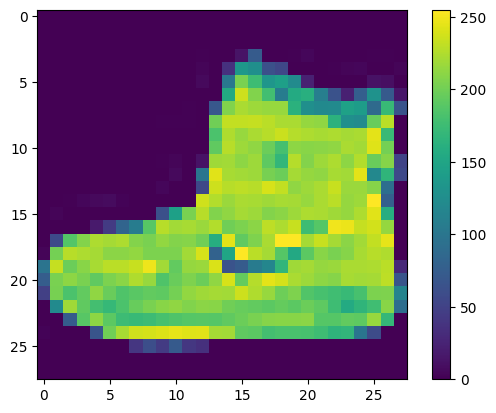

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [150]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images[0]

In [151]:
#existen 10 clases correspondientes a 10 etiquetas (de 0 a 9)
class_names = ['Camiseta', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatillas', 'Bolso', 'Botines']

train_labels #es un array con las etiquetas de las 60000 imágenes de entrenamiento
#test_labels #es un array con las etiquetas de las 10000 imágenes de test

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Preprocesado de datos

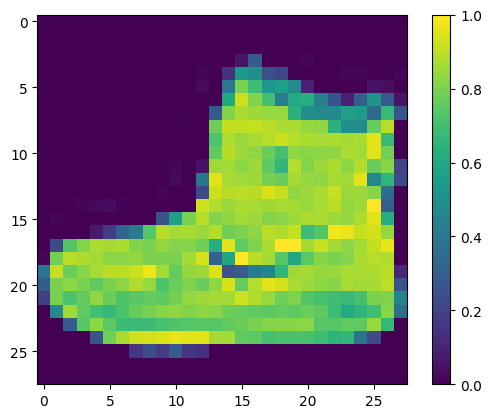

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [152]:
#se normalizan los valores que contiene cada imagen, que están en un rango [0, 255)
train_images = train_images / 255
test_images = test_images / 255

#se comprueba que se han normalizado
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images[0]

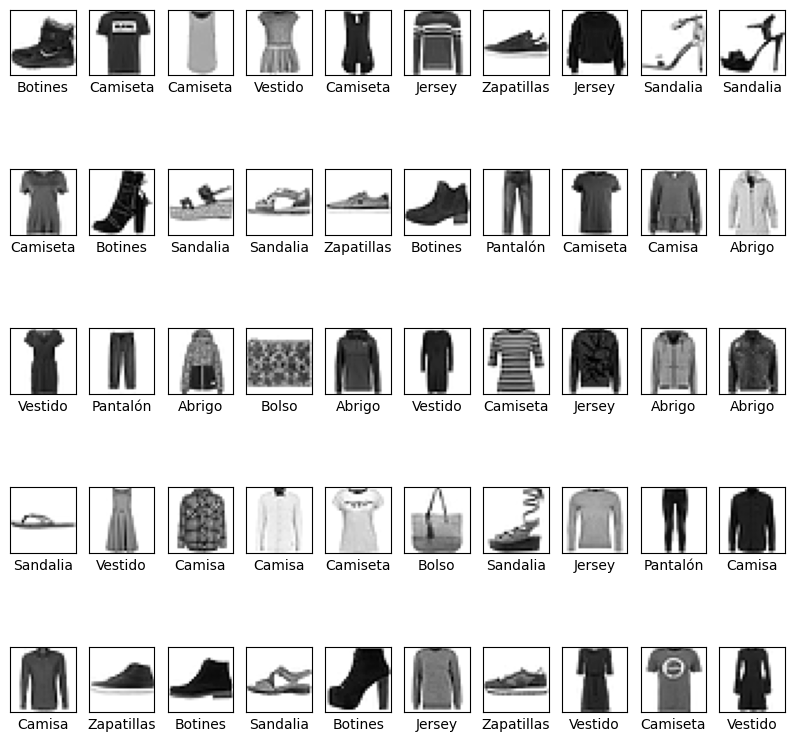

In [153]:
plt.figure(figsize=(10,10))

for i in range(50): #se muestran 50 imágenes de entrenamiento
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) #se asigna el nombre de clase a cada una según el número de etiqueta de cada una
plt.show()

## Creación de la red neuronal de reconocimiento

In [154]:

model = keras.Sequential([
    #neuronas de entrada = 1 por píxel de la imagen -> 28x28 = 784
    keras.layers.Flatten(input_shape=(28,28)), #capa plana
    
    #capa oculta de 15 neuronas
    keras.layers.Dense(15, activation='relu'), #capa densa, función de activación rectificadora (relu)
    
    #neuronas de salida = 1 por cada clase de prenda -> 10
    keras.layers.Dense(10, activation='softmax') #capa densa, función de activación (softmax)
])

model.summary() #resumen de la estructura de la red neuronal
#los parámetros son los pesos

Model: "sequential_8"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 15)                11775     
                                                                 
 dense_17 (Dense)            (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [155]:
#se compila el modelo
model.compile(
    optimizer = 'adam', #se optimiza con el método de adam que es mejor que el gradiente descendente
    loss = 'sparse_categorical_crossentropy', #función de pérdidas, probabilidad de que una prenda pertenezca a una clase
    metrics = ['accuracy']
)

## Entrenamiento del modelo

In [156]:
#model.fit(train_images, train_labels, epochs=10) #una época equivale a un procesamiento completo de todas las imágenes del dataset

#SEGUNDA VERSIÓN -> TENSORBOARD: depuración y checkeo de progreso del modelo con logs e histogramas
cp_callbacks = tf.keras.callbacks.ModelCheckpoint("checkpoints/", save_weights_only=True, verbose=1) #se van guardando los pesos de cada época
tensorboard_callback = tf.keras.callbacks.TensorBoard("logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1) #directorio de log con la fecha

model.fit(
    train_images,
    train_labels, 
    epochs=10,
    validation_data = (test_images,test_labels),
    callbacks = [cp_callbacks, tensorboard_callback]
)

#EN TERMINAL -> tensorboard --logdir logs/ #visualización del tensorboard

Epoch 1/10
1832/1875 [============================>.] - ETA: 0s - loss: 0.6179 - accuracy: 0.7919
Epoch 1: saving model to checkpoints\
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6144 - accuracy: 0.7929 - val_loss: 0.5296 - val_accuracy: 0.8083
Epoch 2/10
1851/1875 [============================>.] - ETA: 0s - loss: 0.4545 - accuracy: 0.8412
Epoch 2: saving model to checkpoints\
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4545 - accuracy: 0.8413 - val_loss: 0.4999 - val_accuracy: 0.8283
Epoch 3/10
1856/1875 [============================>.] - ETA: 0s - loss: 0.4262 - accuracy: 0.8504
Epoch 3: saving model to checkpoints\
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4267 - accuracy: 0.8502 - val_loss: 0.4929 - val_accuracy: 0.8342
Epoch 4/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.4098 - accuracy: 0.8561
Epoch 4: saving model to checkpoints\
1875/1875 [==============================] - 4s 2ms/step 

In [157]:
#se obtienen las pérdidas y la precisión del modelo
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
#si la precisión obtenida aquí es mucho menor que la de las épocas, se está sobreentrenando el modelo

313/313 [==============================] - 1s 2ms/step - loss: 0.4351 - accuracy: 0.8437


## Uso del modelo para predecir

In [158]:
predictions = model.predict(test_images) #se realiza con las imágenes de test
predictions[0] #se muestran los valores de la primera imagen, cada valor del array es la probabilidad de asignación de la imagen a cada una de las clases existentes

313/313 [==============================] - 0s 891us/step


array([1.3984204e-06, 3.4323339e-11, 1.6583064e-07, 4.6007957e-09,
       1.2889581e-07, 4.2243931e-02, 2.6454122e-06, 8.2428595e-03,
       1.4921188e-04, 9.4935971e-01], dtype=float32)

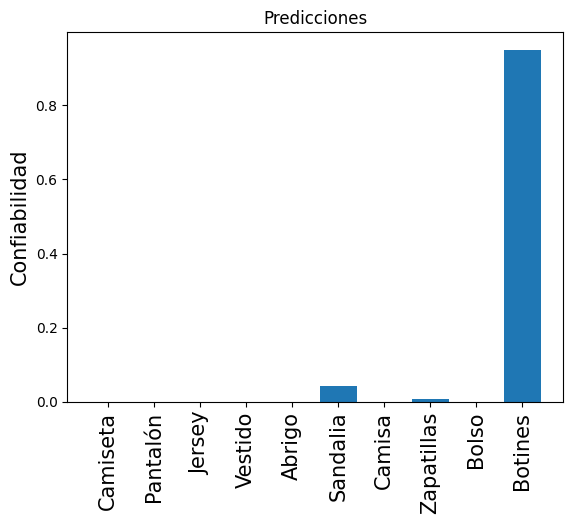

9

In [159]:
#representación de gráfico de barras de los probabilidades obtenidas
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

np.argmax(predictions[0]) #se indica en qué etiqueta se encuentra la mayor probabilidad, en este caso la 9, que corresponde a botines

### Predicción con imágenes externas

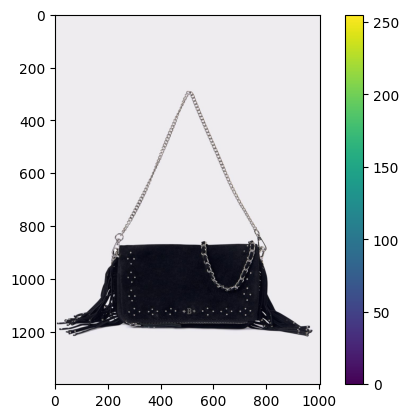

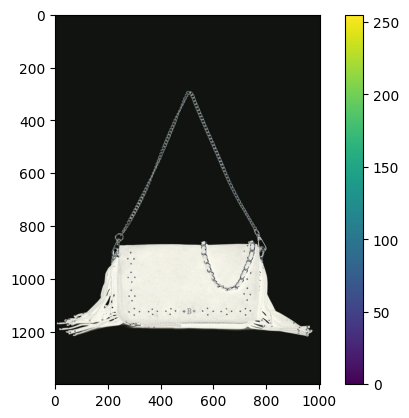

(1400, 1004, 3)

In [160]:
#se obtiene una imagen de internet
response = requests.get("https://www.browniespain.com/es/265873-thickbox_default/bolso-solapa-flecos-tachitas.jpg")
image = Image.open(BytesIO(response.content))

np_image = np.array(image) #se convierte en numpy array

plt.figure()
plt.imshow(np_image)
plt.colorbar()
plt.grid(False)
plt.show()

np_image = 255 - np_image #hay que invertirla para poder predecir respecto a las imágenes del conjunto

plt.figure()
plt.imshow(np_image)
plt.colorbar()
plt.grid(False)
plt.show()

np_image.shape #no tenemos las dimensiones 28x28 y además, hay una 3º dimensión respectiva al color

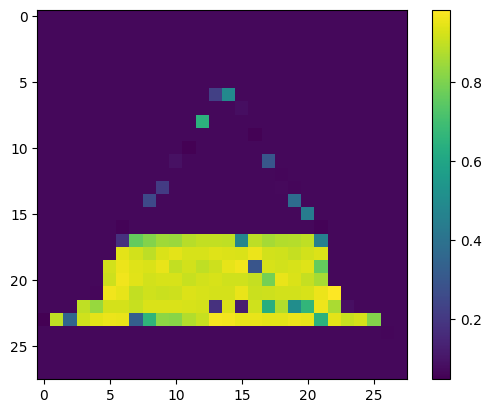

array([[0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588],
       [0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588],
       [0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.06790588, 0.06790588, 0.06790588, 0.06790588,
        0.06790588, 0.0679

In [161]:
np_image = np.dot(np_image[..., :3], [0.333, 0.333, 0.333]) #se pasa la imagen a escala de grises para eliminar la dimensión de color
np_image = cv2.resize(np_image, dsize=(28,28), interpolation=cv2.INTER_CUBIC) #se redimensiona a 28x28
np_image = np_image / 255 #se normaliza

plt.figure()
plt.imshow(np_image)
plt.colorbar()
plt.grid(False)
plt.show()

np_image

In [162]:
#al modelo hay que pasarle un array de imágenes, como solo se le va a pasar una, se crea el array y se añade la imagen al mismo
array = np.zeros((1,28,28))
array[0] = np_image

prediction_image = model.predict(array) #se hace la predicción
prediction_image

1/1 [==============================] - 0s 24ms/step


array([[1.2893647e-04, 3.0585209e-08, 4.9024951e-05, 6.9756556e-05,
        2.4328061e-05, 8.7230386e-05, 6.3803013e-06, 1.0186488e-07,
        9.9963415e-01, 3.2094867e-08]], dtype=float32)

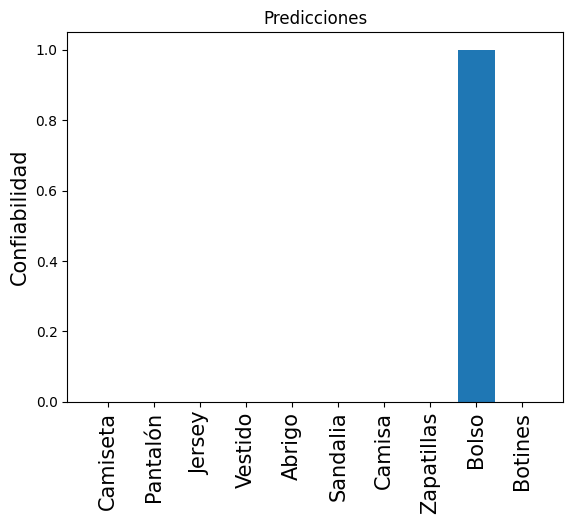

8

In [163]:
#representación de gráfico de barras de los probabilidades obtenidas
index = np.arange(len(class_names))
plt.bar(index, prediction_image[0])
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

np.argmax(prediction_image[0]) #se indica en qué etiqueta se encuentra la mayor probabilidad, en este caso la 9, que corresponde a botines